# Getting started with Layer

[![Open in Layer](https://app.layer.ai/assets/badge.svg)](https://development.layer.co/layer/titanic) [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/layerai/examples/blob/main/titanic/Getting_Started_With_Layer.ipynb) [![Layer Examples Github](https://badgen.net/badge/icon/github?icon=github&label)](https://github.com/layerai/examples/tree/main/titanic)


## Installation


In [1]:
# !pip install --upgrade layer-sdk -q
# !pip install -U scikit-learn

In [1]:
# Standard scientific Python imports
import matplotlib.pyplot as plt
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

from layer.decorators import dataset, model,resources
import pandas as pd
import numpy as np
import layer

## Register and Login

To start using Layer, you have to register and login. Run the following cell, click the link, register and paste the code in the input

In [2]:
layer.login()

## Inititialize Your First Layer Project

It's time to create your first Layer Project. 

In [3]:
layer.init("mecevit-sandbox")

Project(name='mecevit-sandbox', raw_datasets=[], derived_datasets=[], featuresets=[], models=[], path=PosixPath('.'), project_files_hash='', readme='', account=Account(id=UUID('add1b570-c8e7-4187-b747-1d01104893a9'), name='layer'), _id=UUID('495fb81a-2bed-4461-8a4d-61d9dd461e69'), functions=[])

## Train Model


Output()

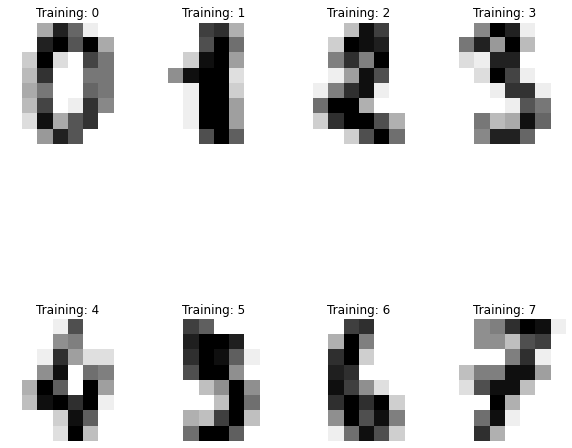

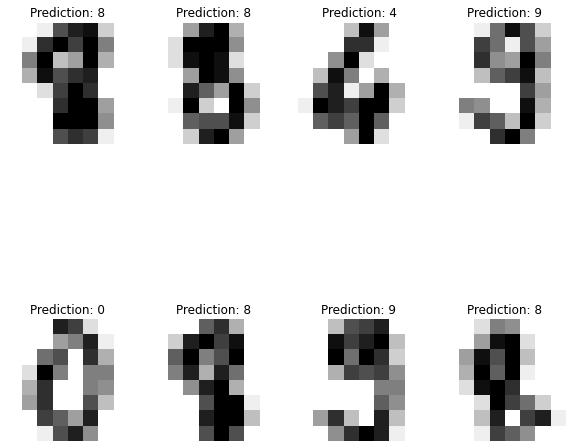

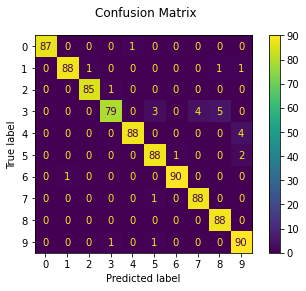

In [28]:
@model("digit-recognizer")
def train_model():
    digits = datasets.load_digits()

    _, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 10))
    for ax, image, label in zip(axes.flat, digits.images, digits.target):
        ax.set_axis_off()
        ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
        ax.set_title("Training: %i" % label)
    
    layer.log({"Training Digits": plt})
    
    
    # flatten the images
    n_samples = len(digits.images)
    data = digits.images.reshape((n_samples, -1))

    # Create a classifier: a support vector classifier
    clf = svm.SVC(gamma=0.001)

    # Split data into 50% train and 50% test subsets
    X_train, X_test, y_train, y_test = train_test_split(
        data, digits.target, test_size=0.5, shuffle=False
    )

    # Learn the digits on the train subset
    clf.fit(X_train, y_train)

    # Predict the value of the digit on the test subset
    predicted = clf.predict(X_test)
    
    _, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 10))
    for ax, image, prediction in zip(axes.flat, X_test, predicted):
        ax.set_axis_off()
        image = image.reshape(8, 8)
        ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
        ax.set_title(f"Prediction: {prediction}")
    
    layer.log({"Predictions": plt})
        
    prediction_metrics = metrics.classification_report(y_test, predicted,output_dict=True)
    layer.log({"Accuracy": prediction_metrics['accuracy']})

    disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
    disp.figure_.suptitle("Confusion Matrix")
    layer.log({"Confusion Matrix Plot": disp.figure_})

    return clf

train_model()

## Where to go from here?

Now that you have created first Layer Project, you can:

- Join our [Slack Community ](https://bit.ly/layercommunityslack)
- Visit [Layer Examples Repo](https://github.com/layerai/examples) for more examples
- Browse [Trending Layer Projects](https://layer.ai) on our mainpage
- Check out [Layer Documentation](https://docs.layer.ai) to learn more